In [13]:
import HTSeq
import glob
import seaborn
import matplotlib.pyplot as plt
import numpy
from scipy.stats.stats import pearsonr


In [15]:
top_hit = {}

for cfile in glob.glob('*.m8'):
    print cfile
    for line in open(cfile,'r'):
        timber = line.split('\t')
        query = cfile + timber[0]
        hit = timber[1].split('|')[1]
        bit = float(timber[11].replace('\n',''))
        
        if query in top_hit:
            prev = top_hit[query]
            if bit > prev[0]:
                top_hit[query] = [bit,hit]
            else:
                continue
        else:
            top_hit[query] = [bit,hit]
        

Aeropyrum_pernix.CDS.fa.OUTPUT.daa.m8
Aquifex_aeolicus.CDS.fa.OUTPUT.daa.m8
Archaeoglobus_fulgidus.CDS.fa.OUTPUT.daa.m8
Hyperthermus_butyilicus.CDS.fa.OUTPUT.daa.m8
Methanococcus_jannaschii.CDS.fa.OUTPUT.daa.m8
Methanopyrus_kandleri.CDS.fa.OUTPUT.daa.m8
Methanothermus_fervidus.CDS.fa.OUTPUT.daa.m8
Pyrococcus_feriosus.CDS.fa.OUTPUT.daa.m8
Pyrodicitium_abyssi.CDS.fa.OUTPUT.daa.m8
Pyrolobus_fumarii.CDS.fa.OUTPUT.daa.m8
Sulfolobus_acidocaldarius.CDS.fa.OUTPUT.daa.m8
Thermocrinis_minervae.CDS.fa.OUTPUT.daa.m8
Thermocrinis_ruber.CDS.fa.OUTPUT.daa.m8
Thermotoga_maritima.CDS.fa.OUTPUT.daa.m8


In [16]:
unique_hits = []

for k,v in top_hit.iteritems():
    if v[1] in unique_hits:
        continue
    else:
        unique_hits.append(v[1])


In [17]:
outputting = open('Unique_genes.txt','w')
for i in unique_hits:
    outputting.write(i + '\n')
outputting.close()

#Gene Info retrieved

In [18]:
GO_term = {}

for line in open('UNIPROT_GeneInfo.tab','r'):
    timber = line.replace('\n','').split('\t')
    if line.startswith('your'):
        continue
    else:
        gene = timber[0]
        GO = timber[16].split(';')
        GO_term[gene] = GO

In [19]:
GO_term

{'I6V2R6': ['integral component of membrane [GO:0016021]',
  ' transmembrane transport [GO:0055085]'],
 'I6V2R2': ['integral component of membrane [GO:0016021]'],
 'Q9UZ74': ['hydrolase activity [GO:0016787]'],
 'Q9UZ75': ['integral component of membrane [GO:0016021]'],
 'Q9UZ76': ['integral component of membrane [GO:0016021]'],
 'Q9UZ77': [''],
 'Q9UZ70': ['integral component of membrane [GO:0016021]',
  ' plasma membrane [GO:0005886]',
  ' alanine:sodium symporter activity [GO:0015655]'],
 'Q9UZ71': ['pyridoxal phosphate binding [GO:0030170]',
  ' transaminase activity [GO:0008483]'],
 'Q9UZ73': ['catalytic activity [GO:0003824]',
  ' base-excision repair [GO:0006284]'],
 'Q60353': [''],
 'Q60352': ['cytosol [GO:0005829]',
  ' ATP binding [GO:0005524]',
  ' isopentenyl phosphate kinase activity [GO:0102043]',
  ' kinase activity [GO:0016301]',
  ' terpenoid biosynthetic process [GO:0016114]'],
 'Q60351': ['intracellular [GO:0005622]',
  " DNA-directed 5'-3' RNA polymerase activity [G

In [20]:
GO_totals = {}
for k,v in GO_term.iteritems():
    for i in v:
        if i in GO_totals.keys():
            continue
        else:
            GO_totals[i] = []




for cfile in glob.glob('*.m8'):
    print cfile
    temp = {}
    for line in open(cfile,'r'):
        timber = line.split('\t')
        query = timber[0]
        hit = timber[1].split('|')[1]
        bit = float(timber[11].replace('\n',''))
        
        if query in temp:
            prev = temp[query]
            if bit > prev[0]:
                temp[query] = [bit,hit]
            else:
                continue
        else:
            temp[query] = [bit,hit]
    temp_GOs = {}       
    for k,v in temp.iteritems():
        GOs = GO_term[v[1]]
        for i in GOs:
            if i in temp_GOs:
                temp_GOs[i] +=1
            else:
                temp_GOs[i] = 1
    
    temp_edits = {}
    for k,v in GO_totals.iteritems():
        if k in temp_GOs.keys():
            prev = GO_totals[k]
            prev.append(temp_GOs[k])
            temp_edits[k] = prev
        else:
            prev = GO_totals[k]
            prev.append(0)
            temp_edits[k] = prev
            
            
    GO_totals = temp_edits
            

Aeropyrum_pernix.CDS.fa.OUTPUT.daa.m8
Aquifex_aeolicus.CDS.fa.OUTPUT.daa.m8
Archaeoglobus_fulgidus.CDS.fa.OUTPUT.daa.m8
Hyperthermus_butyilicus.CDS.fa.OUTPUT.daa.m8
Methanococcus_jannaschii.CDS.fa.OUTPUT.daa.m8
Methanopyrus_kandleri.CDS.fa.OUTPUT.daa.m8
Methanothermus_fervidus.CDS.fa.OUTPUT.daa.m8
Pyrococcus_feriosus.CDS.fa.OUTPUT.daa.m8
Pyrodicitium_abyssi.CDS.fa.OUTPUT.daa.m8
Pyrolobus_fumarii.CDS.fa.OUTPUT.daa.m8
Sulfolobus_acidocaldarius.CDS.fa.OUTPUT.daa.m8
Thermocrinis_minervae.CDS.fa.OUTPUT.daa.m8
Thermocrinis_ruber.CDS.fa.OUTPUT.daa.m8
Thermotoga_maritima.CDS.fa.OUTPUT.daa.m8


In [21]:
GO_totals

{'': [510, 275, 699, 550, 409, 516, 242, 550, 468, 688, 723, 1072, 375, 380],
 ' glycerol-3-phosphate dehydrogenase [NADP+] activity [GO:0036439]': [0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  2],
 ' sodium ion transmembrane transport [GO:0035725]': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1],
 ' sulfate assimilation [GO:0000103]': [2,
  0,
  2,
  2,
  0,
  0,
  0,
  0,
  2,
  2,
  1,
  0,
  1,
  0],
 ' UDP-3-O-acyl-N-acetylglucosamine deacetylase activity [GO:0103117]': [0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0],
 'cellular metabolic process [GO:0044237]': [2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0],
 ' UDP-3-O-[3-hydroxymyristoyl] N-acetylglucosamine deacetylase activity [GO:0008759]': [0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0],
 ' putrescine-importing ATPase activity [GO:0015594]': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1],
 ' carbohyd

In [12]:
outputting = open('GO_totals.csv','w')

line = 'GO,Aeropyrum_pernix.CDS.fa.OUTPUT.daa.m8,Aquifex_aeolicus.CDS.fa.OUTPUT.daa.m8,Archaeoglobus_fulgidus.CDS.fa.OUTPUT.daa.m8,Hyperthermus_butyilicus.CDS.fa.OUTPUT.daa.m8,Methanococcus_jannaschii.CDS.fa.OUTPUT.daa.m8,Methanopyrus_kandleri.CDS.fa.OUTPUT.daa.m8,Methanothermus_fervidus.CDS.fa.OUTPUT.daa.m8,Pyrococcus_feriosus.CDS.fa.OUTPUT.daa.m8,Pyrodicitium_abyssi.CDS.fa.OUTPUT.daa.m8,Pyrolobus_fumarii.CDS.fa.OUTPUT.daa.m8,Sulfolobus_acidocaldarius.CDS.fa.OUTPUT.daa.m8,Thermocrinis_minervae.CDS.fa.OUTPUT.daa.m8,Thermocrinis_ruber.CDS.fa.OUTPUT.daa.m8,Thermotoga_maritima.CDS.fa.OUTPUT.daa.m8\n'
outputting.write(line)

for k,v in GO_totals.iteritems():
    temp = k
    for i in v:
        temp = temp + ',' + str(i)
    outputting.write(temp + '\n')
    
outputting.close()

#Correlation analysis

In [14]:
species_temp = {}

species_temp['Aeropyrum pernix'] =  100
species_temp['Aquifex aeolicus'] =  95
species_temp['Archaeoglobus fulgidus'] =  95
species_temp['Hyperthermus butyilicus'] =  112
species_temp['Methanococcus jannaschii'] =  85
species_temp['Methanopyrus kandleri AV19'] =  122
species_temp['Methanothermus fervidus'] =  97
species_temp['Pyrococcus furiosus'] =  105
species_temp['Pyrodicitium abyssi'] =  110
species_temp['Pyrolobus fumarii'] =  113
species_temp['Sulfolobus acidocaldarius'] =  85
species_temp['Thermocrinis minervae'] =  85
species_temp['Thermocrinis ruber'] =  89
species_temp['Thermotoga maritima'] =  90




RNA binding [GO:0003723] 0.761974905629


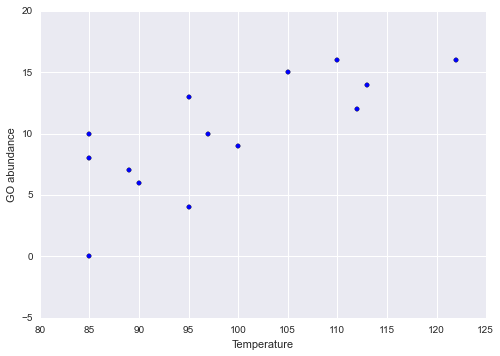

 translation initiation factor activity [GO:0003743] 0.676123591396


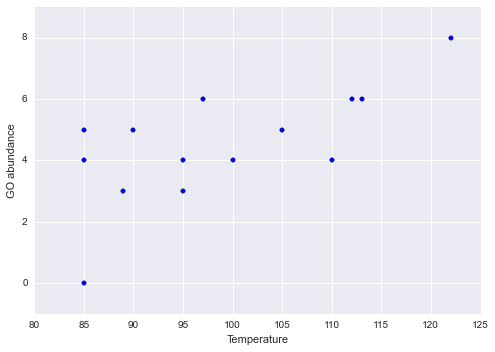

ribonucleoside-triphosphate reductase activity [GO:0008998] 0.830869033237


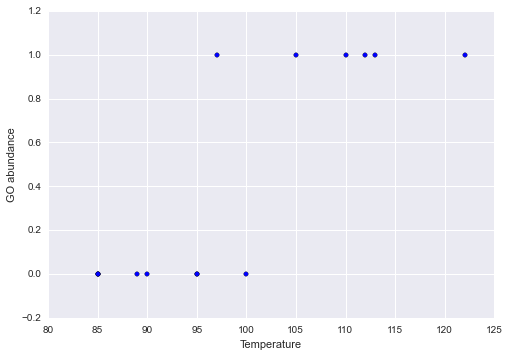

 tRNA guanylyltransferase activity [GO:0008193] 0.67085910969


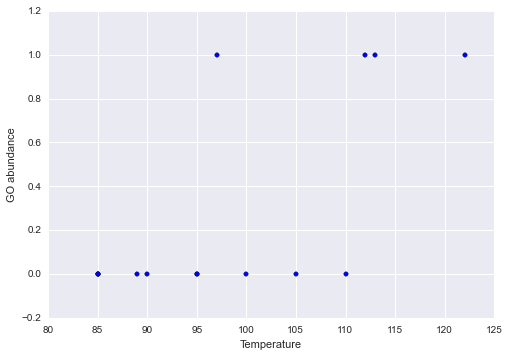

 potassium ion transmembrane transporter activity [GO:0015079] 0.715118026606


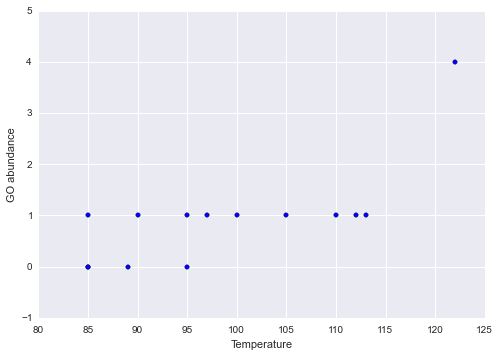

nicotinate-nucleotide diphosphorylase (carboxylating) activity [GO:0004514] 0.718074541761


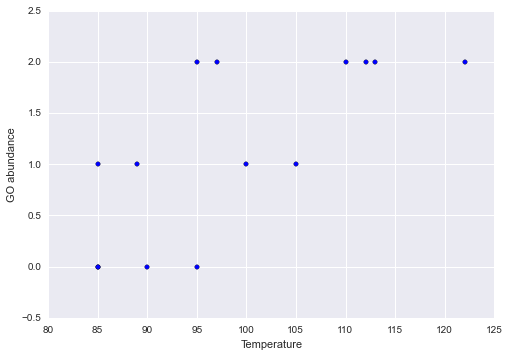

tRNA adenylyltransferase activity [GO:0004810] 0.719135622641


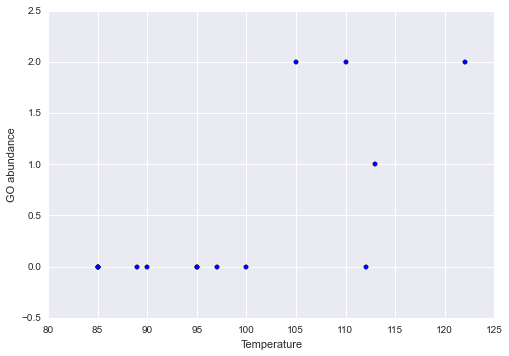

ATPase-coupled molybdate transmembrane transporter activity [GO:0015412] 0.712052212916


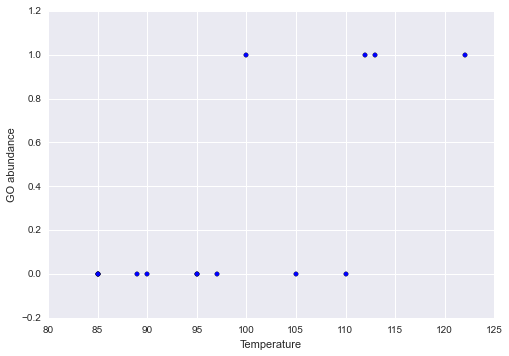

 tRNA splicing, via endonucleolytic cleavage and ligation [GO:0006388] 0.793741361974


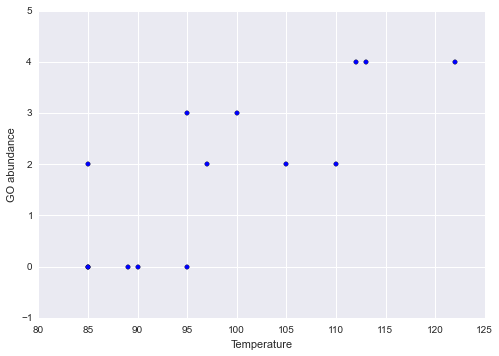

In [27]:
Temperatures = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]

for k,v in GO_totals.iteritems():
    editv = []
    for i in v:
        editv.append(int(i))
    r,p = pearsonr(Temperatures,editv)
    if p <= 0.01:
        print k, r
        plt.scatter(Temperatures,editv)
        plt.ylabel('GO abundance')
        plt.xlabel('Temperature')
        plt.show()



#Percentage GO abundance

In [37]:
GO_totals

{'': [510, 275, 699, 550, 409, 516, 242, 550, 468, 688, 723, 1072, 375, 380],
 ' glycerol-3-phosphate dehydrogenase [NADP+] activity [GO:0036439]': [0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  2],
 ' sodium ion transmembrane transport [GO:0035725]': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1],
 ' sulfate assimilation [GO:0000103]': [2,
  0,
  2,
  2,
  0,
  0,
  0,
  0,
  2,
  2,
  1,
  0,
  1,
  0],
 ' UDP-3-O-acyl-N-acetylglucosamine deacetylase activity [GO:0103117]': [0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0],
 'cellular metabolic process [GO:0044237]': [2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0],
 ' UDP-3-O-[3-hydroxymyristoyl] N-acetylglucosamine deacetylase activity [GO:0008759]': [0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0],
 ' putrescine-importing ATPase activity [GO:0015594]': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1],
 ' carbohyd

In [40]:
Temperatures = [100,95,95,112,85,122,97,105,110,113,85,85,89,90]

totals = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for k,v in GO_totals.iteritems():
    temp = []
    for i,l in zip(v,totals):
        #print i,l
        temp.append(i+l)
    totals = temp
        

print totals

[3409, 4507, 5009, 3235, 4640, 3504, 3188, 4292, 3921, 3557, 4415, 1522, 4108, 4966]


In [76]:
perc_GOs = {}
for k,v in GO_totals.iteritems():
    temp = []
    for i,l in zip(v,totals):
        temp.append((i/float(l))*100)
    if sum(temp) >= 0.5:
        perc_GOs[k] = temp
        

print perc_GOs

{'': [14.960398943971839, 6.101619702684713, 13.954881213815131, 17.001545595054097, 8.814655172413794, 14.726027397260275, 7.590966122961104, 12.814538676607642, 11.935730680948737, 19.342142254709024, 16.37599093997735, 70.43363994743758, 9.12852969814995, 7.652033830044301], ' bacterial-type flagellum-dependent cell motility [GO:0071973]': [0.0, 0.22187708009762588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36514118792599803, 0.3624647603705195], ' lyase activity [GO:0016829]': [0.0, 0.06656312402928778, 0.2395687762028349, 0.21638330757341576, 0.1939655172413793, 0.4280821917808219, 0.15683814303638646, 0.13979496738117428, 0.35705177250701353, 0.16868147315153217, 0.11325028312570783, 0.0657030223390276, 0.024342745861733205, 0.16109544905356424], 'hydrolase activity [GO:0016787]': [0.5866823115283074, 0.24406478810738852, 0.5789578758235177, 0.80370942812983, 0.40948275862068967, 1.341324200913242, 0.5959849435382686, 0.5591798695246971, 0.9436368273399643, 0.5903851560

In [74]:
import scipy

#print combined_dic


def correct_pvalues_for_multiple_testing(pvalues, correction_type = "Benjamini-Hochberg"):                
    """                                                                                                   
    consistent with R - print correct_pvalues_for_multiple_testing([0.0, 0.01, 0.029, 0.03, 0.031, 0.05, 0.069, 0.07, 0.071, 0.09, 0.1]) 
    """
    from numpy import array, empty                                                                        
    pvalues = array(pvalues) 
    n = float(pvalues.shape[0])                                                                           
    new_pvalues = empty(n)
    if correction_type == "Bonferroni":                                                                   
        new_pvalues = n * pvalues
    elif correction_type == "Bonferroni-Holm":                                                            
        values = [ (pvalue, i) for i, pvalue in enumerate(pvalues) ]                                      
        values.sort()
        for rank, vals in enumerate(values):                                                              
            pvalue, i = vals
            new_pvalues[i] = (n-rank) * pvalue                                                            
    elif correction_type == "Benjamini-Hochberg":                                                         
        values = [ (pvalue, i) for i, pvalue in enumerate(pvalues) ]                                      
        values.sort()
        values.reverse()                                                                                  
        new_values = []
        for i, vals in enumerate(values):                                                                 
            rank = n - i
            pvalue, index = vals                                                                          
            new_values.append((n/rank) * pvalue)                                                          
        for i in xrange(0, int(n)-1):  
            if new_values[i] < new_values[i+1]:                                                           
                new_values[i+1] = new_values[i]                                                           
        for i, vals in enumerate(values):
            pvalue, index = vals
            new_pvalues[index] = new_values[i]                                                                                                                  
    return new_pvalues






323
 cation transmembrane transporter activity [GO:0008324] 0.701835265841 0.00514446075499


/Users/thomashitch/lab-dev/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


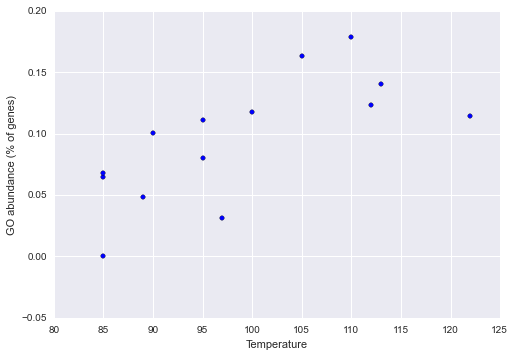

 exosome (RNase complex) [GO:0000178] 0.70649536199 0.00473355166221


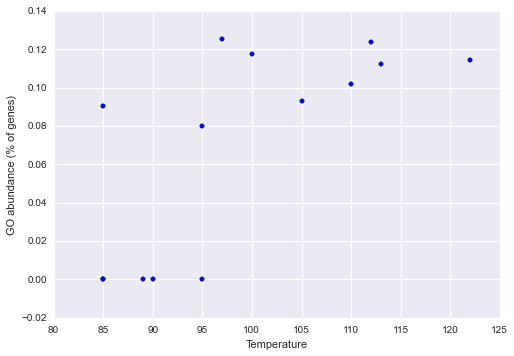

catalytic activity [GO:0003824] 0.750882004667 0.00196821131468


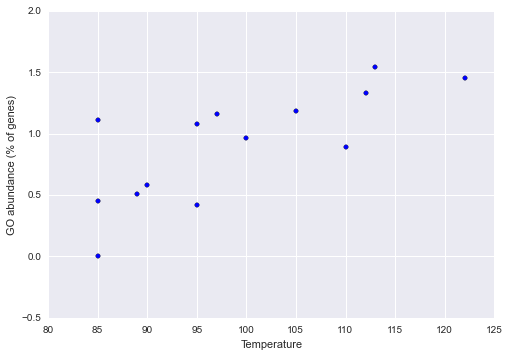

 tRNA splicing, via endonucleolytic cleavage and ligation [GO:0006388] 0.821367825062 0.000315451474574


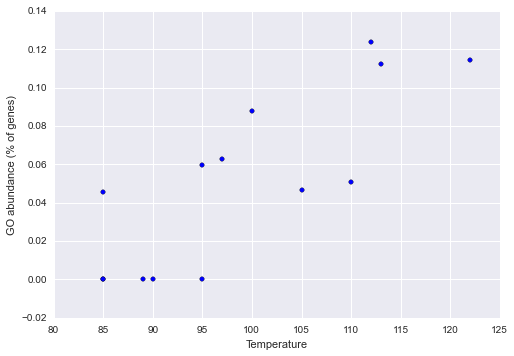

RNA binding [GO:0003723] 0.865291182897 6.41332086348e-05


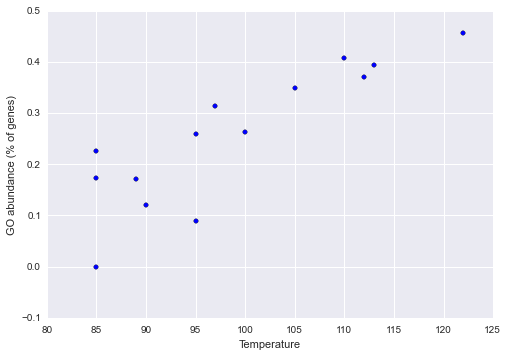

 translation initiation factor activity [GO:0003743] 0.753530621411 0.00185756999746


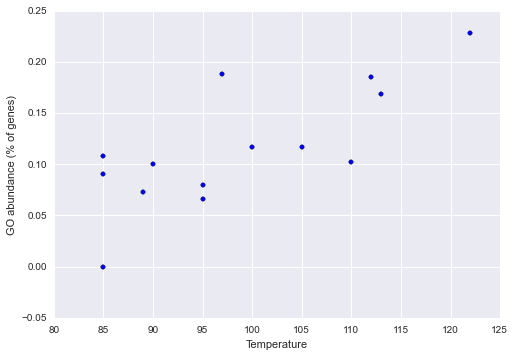

In [83]:
print len(perc_GOs)
for k,v in perc_GOs.iteritems():
    editv = []
    #print v
    for i in v:
        editv.append(float(i))
    r,p = pearsonr(Temperatures,editv)
    p_vals = [p]
    for i in perc_GOs.keys():
        p_vals.append(1)
    new_pvals = correct_pvalues_for_multiple_testing(p_vals)[0]
#    if new_pvals <= 0.1:
#        print k, r,p, new_pvals
#        plt.scatter(Temperatures,editv)
#        plt.ylabel('GO abundance')
#        plt.xlabel('Temperature')
#        plt.show()
    if p <= 0.05:
        if r > 0.7:
            print k, r,p
            plt.scatter(Temperatures,editv)
            plt.ylabel('GO abundance (% of genes)')
            plt.xlabel('Temperature')
            plt.show()

In [64]:
vals = [1]

for i in range(0,10):
     vals.append(0)
        
print vals

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
